<h3>Modelo de clasificación de imagenes Pizza vs. Helado</h3>
<p>Aldo Tena García - A01275222</p>

In [46]:
#Importar las librerias necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

import os
from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage

In [47]:
#Establecer los directorios de las imágenes
#Directorio base
base_dir = 'D:\DocumentosDD\Profesional\8vo Semestre\Aplicaciones avanzadas\Modulo 2 - IA\ImageClassification'
#Directorios de train y test
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
#Directorios de train para pizza y helado
train_pizza = os.path.join(train_dir,'pizza')
train_icecream = os.path.join(train_dir, 'icecream')
#Directorios de test para pizza y helado
test_pizza = os.path.join(test_dir,'pizza')
test_icecream = os.path.join(test_dir, 'icecream')

In [48]:
#Tamaño al que quieres redimensionar las imágenes (en píxeles)
size = (224,224) 
#Función para iterar sobre todos los archivos en la carpeta
def resize(folder):
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            full_path = os.path.join(folder, file)
            image = Image.open(full_path)
            resized_image = image.resize(size, Image.ANTIALIAS)
            resized_image.save(os.path.join(folder,file))
#Redimensionar test-pizza
resize(test_pizza)
#Redimensionar test-icecream
resize(test_icecream)
#Redimensionar train-pizza
resize(train_pizza)
#Redimensionar train-icecream
resize(train_icecream)

C:\Users\atg00\AppData\Local\Temp\ipykernel_26896\2130578046.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


### Data augmentation

In [50]:
#Configurar los parametros necesarios para el data augmentation
train_datagen = ImageDataGenerator(
					rescale = 1./255,
					rotation_range = 30,
					width_shift_range = 0.2,
					height_shift_range = 0.2,
					shear_range = 0.3,
					zoom_range = 0.3,
					horizontal_flip = True
					)

In [55]:
#Configurar el train_datagen 
train_generator = train_datagen.flow_from_directory(
					train_dir,
					target_size = (224,224),
					batch_size = 32,
					class_mode ='binary',
					)

Found 720 images belonging to 2 classes.


### Imprimir imágenes generadas

<Figure size 640x480 with 0 Axes>

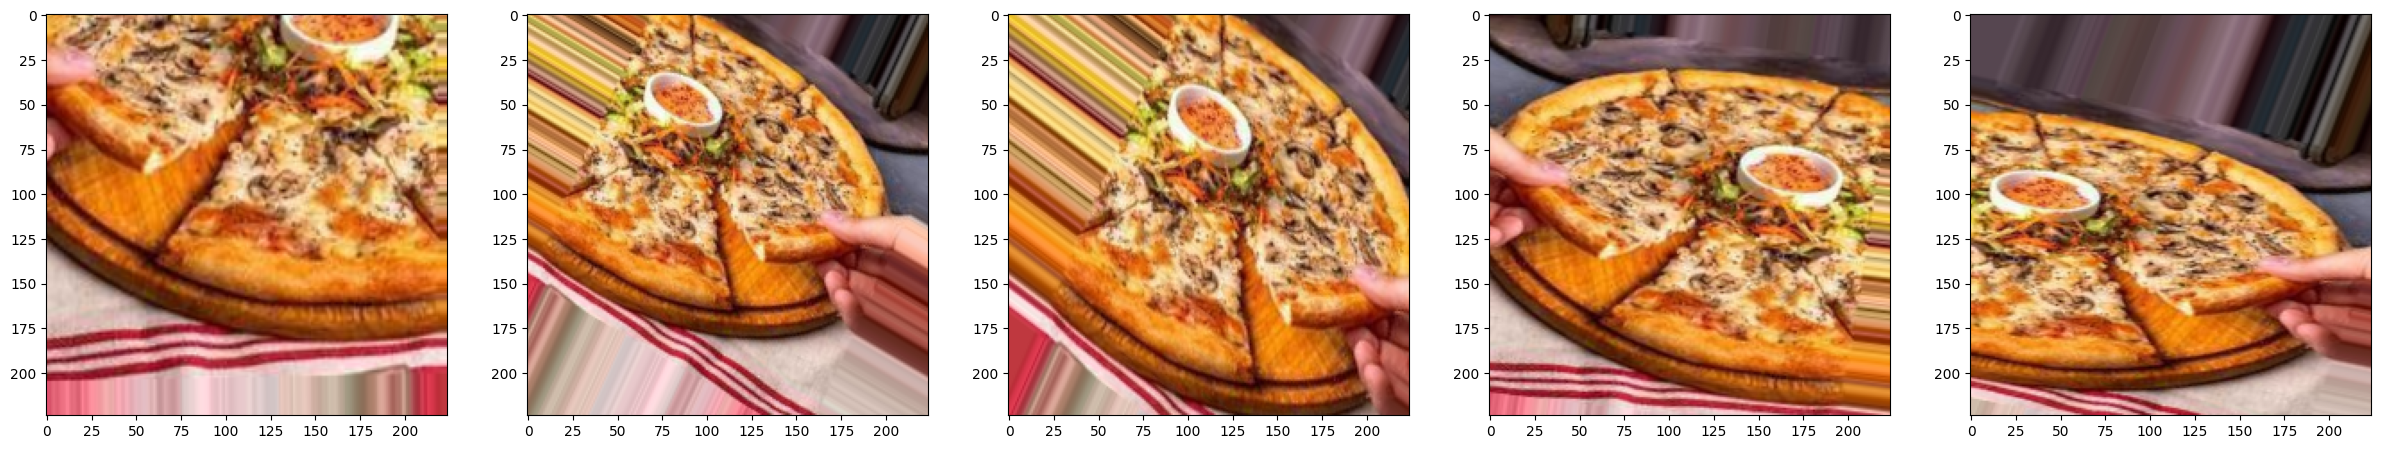

In [56]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30,8)) 
for i in range(5) :
    axarr[i].imshow(train_generator[0][0][0])

(32, 224, 224, 3)
[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

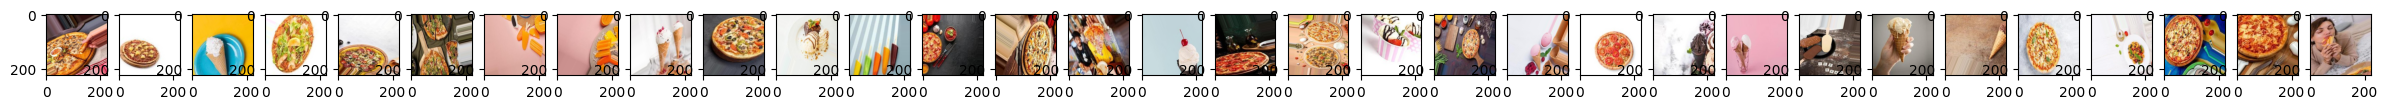

In [57]:
images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
    axarr[i].imshow(images[i])

### Red neuronal convolucional

c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 74, 74, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 128)      │       147,58

 Total params: 2,384,385 (9.10 MB)

 Trainable params: 2,380,673 (9.08 MB)

 Non-trainable params: 3,712 (14.50 KB)

Epoch 1/25


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - acc: 0.6732 - loss: 0.9648
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - acc: 0.8147 - loss: 0.7039
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - acc: 0.8732 - loss: 0.3993
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9193 - loss: 0.2354
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9153 - loss: 0.2564
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9111 - loss: 0.2603
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9088 - loss: 0.2604
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9009 - loss: 0.2516
Epoch 9/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9108 - loss: 0.2659
Epoch 10/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9100 - loss: 0.2198
Epoch 11/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9478 - loss: 0.1644
Epoch 12/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9216 - loss: 0.2207
Epoch 13/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.

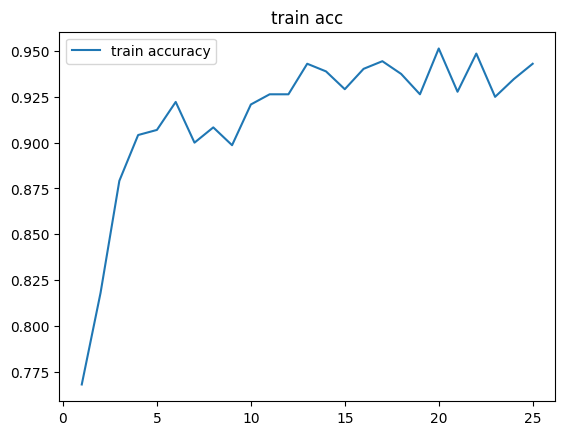

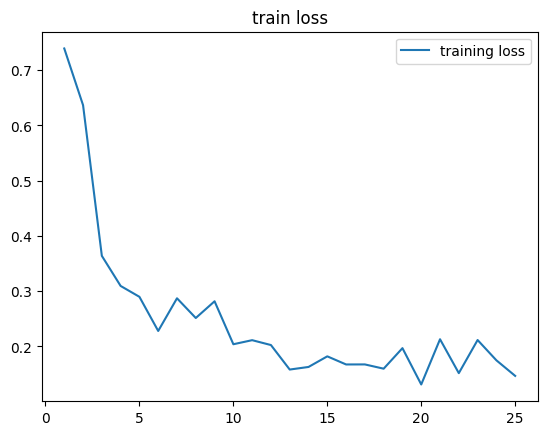

Found 180 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - acc: 0.7877 - loss: 0.7321 

test acc :
 0.7666666507720947


c:\Users\atg00\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [59]:
# Definición del modelo
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

# Tercera capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Cuarta capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())

# Quinta capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())

# Capas finales
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Cambiar a una única neurona con 'sigmoid'

model.summary()

# Compilación del modelo
model.compile(loss='binary_crossentropy',  # Cambiar a 'binary_crossentropy'
                optimizer=optimizers.Adam(learning_rate=0.001),
                metrics=['acc'])

# Entrenamiento del modelo
history = model.fit(train_generator, epochs=25)

# Visualización de los resultados de entrenamiento
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='train accuracy')
plt.title('train acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, '-', label='training loss')
plt.title('train loss')
plt.legend()
plt.show()

# Generador de datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'  # Cambiar a 'binary'
)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_generator, steps=25)
print('\ntest acc :\n', test_acc)
